<a href="https://colab.research.google.com/github/agustinbrusco/Fisica-4/blob/main/Bloc_de_Notas_F%C3%ADsica_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#$\text{Física 4}$

Profesor: [Diego Wisniacki](wisniacki@gmail.com)

In [20]:
import numpy as np  # Cálculo numérico
import sympy as sym  # Cálculo simbólico
import scipy.constants as cte  # Constantes de la naturaleza
import matplotlib.pyplot as plt  # Graficos
import plotly.express as px  # Graficos 2D Interactivos
import plotly.graph_objects as go  # Graficos 3D Interactivos

from matplotlib import rcParams  # Para aumentar la resolución de los gráficos de Matplot
%config InlineBackend.figure_format='retina'
rcParams['font.family'] = 'serif'
rcParams['figure.figsize'] = (8, 4)
rcParams['figure.dpi'] = 150

# Esto es para que las cosas se impriman en Latex y todes podamos ser felices
def custom_latex_printer(exp,**options):
    from google.colab.output._publish import javascript
    url = ("https://cdnjs.cloudflare.com/ajax/libs" +
           "/mathjax/2.7.3/latest.js?config=default")
    javascript(url=url)
    return sym.printing.latex(exp,**options)
sym.init_printing(use_latex="mathjax",latex_printer=custom_latex_printer)


In [ ]:
#@title constantes varias

# Unidades:
unitsl = {'km': 1e3, 'm': 1, 'dm': 1e-1, 'cm': 1e-2, 'mm': 1e-3, 'um': 1e-6,
          'mi': 1609.34, 'yd': 0.9144, 'ft': 0.3048, 'in': 0.0254}
unitsv = {'m^3': 1, 'dm^3': 1e-3, 'cm^3': 1e-6, 'mm^3': 1e-9, 'um^3': 1e-18,
          'l': 1e-3, 'ml': 1e-6, 'cup': 2.5e-4, 'ft^3': 2.831647e-2}
unitsm = {'t': 1e6, 'kg': 1e3, 'g': 1, 'cg': 1e-2, 'mg': 1e-3, 'ug': 1e-6,
          'u': 1.6605402e-24, 'lb': 4.5359237e2, 'oz': 28349523125e1}
unitst = {'y': 31540000, 'd': 86400, 'h': 3600, 'min': 60, 's': 1, 'ms': 1e-3,
          'us': 1e-6}

print('k =', cte.physical_constants['Boltzmann constant'])
print('R =', cte.physical_constants['molar gas constant'])
print('N_A =', cte.physical_constants['Avogadro constant'])
print('1 atm =', cte.physical_constants['standard atmosphere'])

k = (1.380649e-23, 'J K^-1', 0.0)
R = (8.314462618, 'J mol^-1 K^-1', 0.0)
N_A = (6.02214076e+23, 'mol^-1', 0.0)
1 atm = (101325.0, 'Pa', 0.0)


##Guía 1

In [ ]:
#@title 1.c)
dx, dy, dz = sym.symbols('dx, dy, dz')
expr = 'sqrt(a**2 - x**2 - y**2)'
z = sym.sympify(expr)
display(z)
display(sym.Eq(dz, (z.diff('x'))*dx + (z.diff('y'))*dy))

   ______________
  ╱  2    2    2 
╲╱  a  - x  - y  

              dx⋅x                dy⋅y      
dz = - ───────────────── - ─────────────────
          ______________      ______________
         ╱  2    2    2      ╱  2    2    2 
       ╲╱  a  - x  - y     ╲╱  a  - x  - y  

In [ ]:
#@title 3.a) y 3.b)
a, b, R = sym.symbols('a, b, R', real=True, positive=True)
p, T, v = sym.symbols('p, T, v', real=True)
n = sym.symbols('n', integer=True)
# Van del Waals
expr = 'Eq(p, R*T/(v-b) - a/v**2)'
van_der_waals = sym.sympify(expr).subs({'a': a, 'b': b, 'R': R,
                                        'p': p, 'T': T, 'v': v})
# display(van_der_waals)
# p_sol = []
# for sol in sym.solveset(van_der_waals, p):
#     p_sol.append(sol)
# # v_sol = []
# # for sol in sym.solveset(van_der_waals, v):
# #     v_sol.append(sol)
# T_sol = []
# for sol in sym.solveset(van_der_waals, T):
#     T_sol.append(sol)
# p_sol[0].diff(v), T_sol[0].diff(p)
# Gas Ideal
expr = 'Eq(p*v, n*R*T)'
ideal_gas = sym.sympify(expr).subs({'a': a, 'b': b, 'R': R, 'n': n,
                                    'p': p, 'T': T, 'v': v})
# display(ideal_gas)
# for sol in sym.solveset(ideal_gas, p):
#     p_sol = sol
# for sol in sym.solveset(ideal_gas, v):
#     v_sol = sol
# for sol in sym.solveset(ideal_gas, T):
#     T_sol = sol
# display(p_sol.diff(v)*v_sol.diff(T)*T_sol.diff(p))

p⋅v = R⋅T⋅n

-R⋅T⋅n 
───────
  p⋅v  

In [ ]:
#@title 4.b)
# Datos
d_e = 5  # cm
d_a = 4.995  # cm
alfa_e = 1.9e-6  # °C⁻¹
alfa_a = 1.1e-5  # °C⁻¹
T = 25  # °C
# Calentando solo el anillo.
T_f = (d_e - d_a)/(alfa_a*d_a) + T
print(f'Calentando solo el anillo, se debe alcanzar una temperatura de {T_f:.3g} °C')
# Calentando solo la esfera.
T_f = (d_a - d_e)/(alfa_e*d_e - alfa_a*d_a) + T
print('Calentando el anillo y la esfera a la vez,' +
      f'se debe alcanzar una temperatura de {T_f:.3g} °C')

Calentando solo el anillo, se debe alcanzar una temperatura de 116 °C
Calentando el anillo y la esfera a la vez,se debe alcanzar una temperatura de 135 °C


In [ ]:
#@title 4.c)
V_0 = 40*cte.liter  # m³
h = 0.75  # m
A_0 = V_0/h  # m²
T_0 = 20  # °C
T_f = 35  # °C
Delta_T = T_f - T_0  # °C
beta_H2O = 207e-6  # °C⁻¹
beta_Al = 69e-6  # °C⁻¹

V_H2O = beta_H2O*Delta_T*V_0 + V_0  # m³
h_f = beta_Al/3*Delta_T*h + h  # m
A_f = beta_Al/2*Delta_T*A_0 + A_0  # m²
V_Al = h_f*A_f  # m³
print(f'El volumen final de agua, {V_H2O:.4g} m³, resultó mayor que el volumen final de su contenedor, {V_Al:.4g} m³.')
g = cte.g  # m/s²
rho_0 = 0.99802  # kg/m³
p_atm = cte.value('standard atmosphere')  # Pa
# La presión en el fondo del tacho al principio
p_0 = rho_0*g*h + p_atm  # Pa
rho_f = 0.99318  # kg/m³
# La presión en el fondo del tacho al final
p_f = rho_f*g*h_f + p_atm  # Pa
print(f'La presión final del agua en el fondo del tacho varió {p_f - p_0:.4g} Pa respecto de la presión inicial.')


El volumen final de agua, 0.04012 m³, resultó mayor que el volumen final de su contenedor, 0.04003 m³.
La presión final del agua en el fondo del tacho varió -0.03308 Pa respecto de la presión inicial.


In [ ]:
#@title 5$^{(***)}$.b
p = 0.35*cte.bar  # Pa = N/m²
T = cte.convert_temperature(80, 'Celsius', 'Kelvin')  # K
v = 4.625  # m³/kg
R = cte.R  # J/(mol.K) = N.m/(mol.K)
b = (R*T/p - v)*T**3  # K³.m³/kg

print(f'b = {b:.6g}  K³.m³/kg')

b = -2.00004e+08  K³.m³/kg


##Guía 2

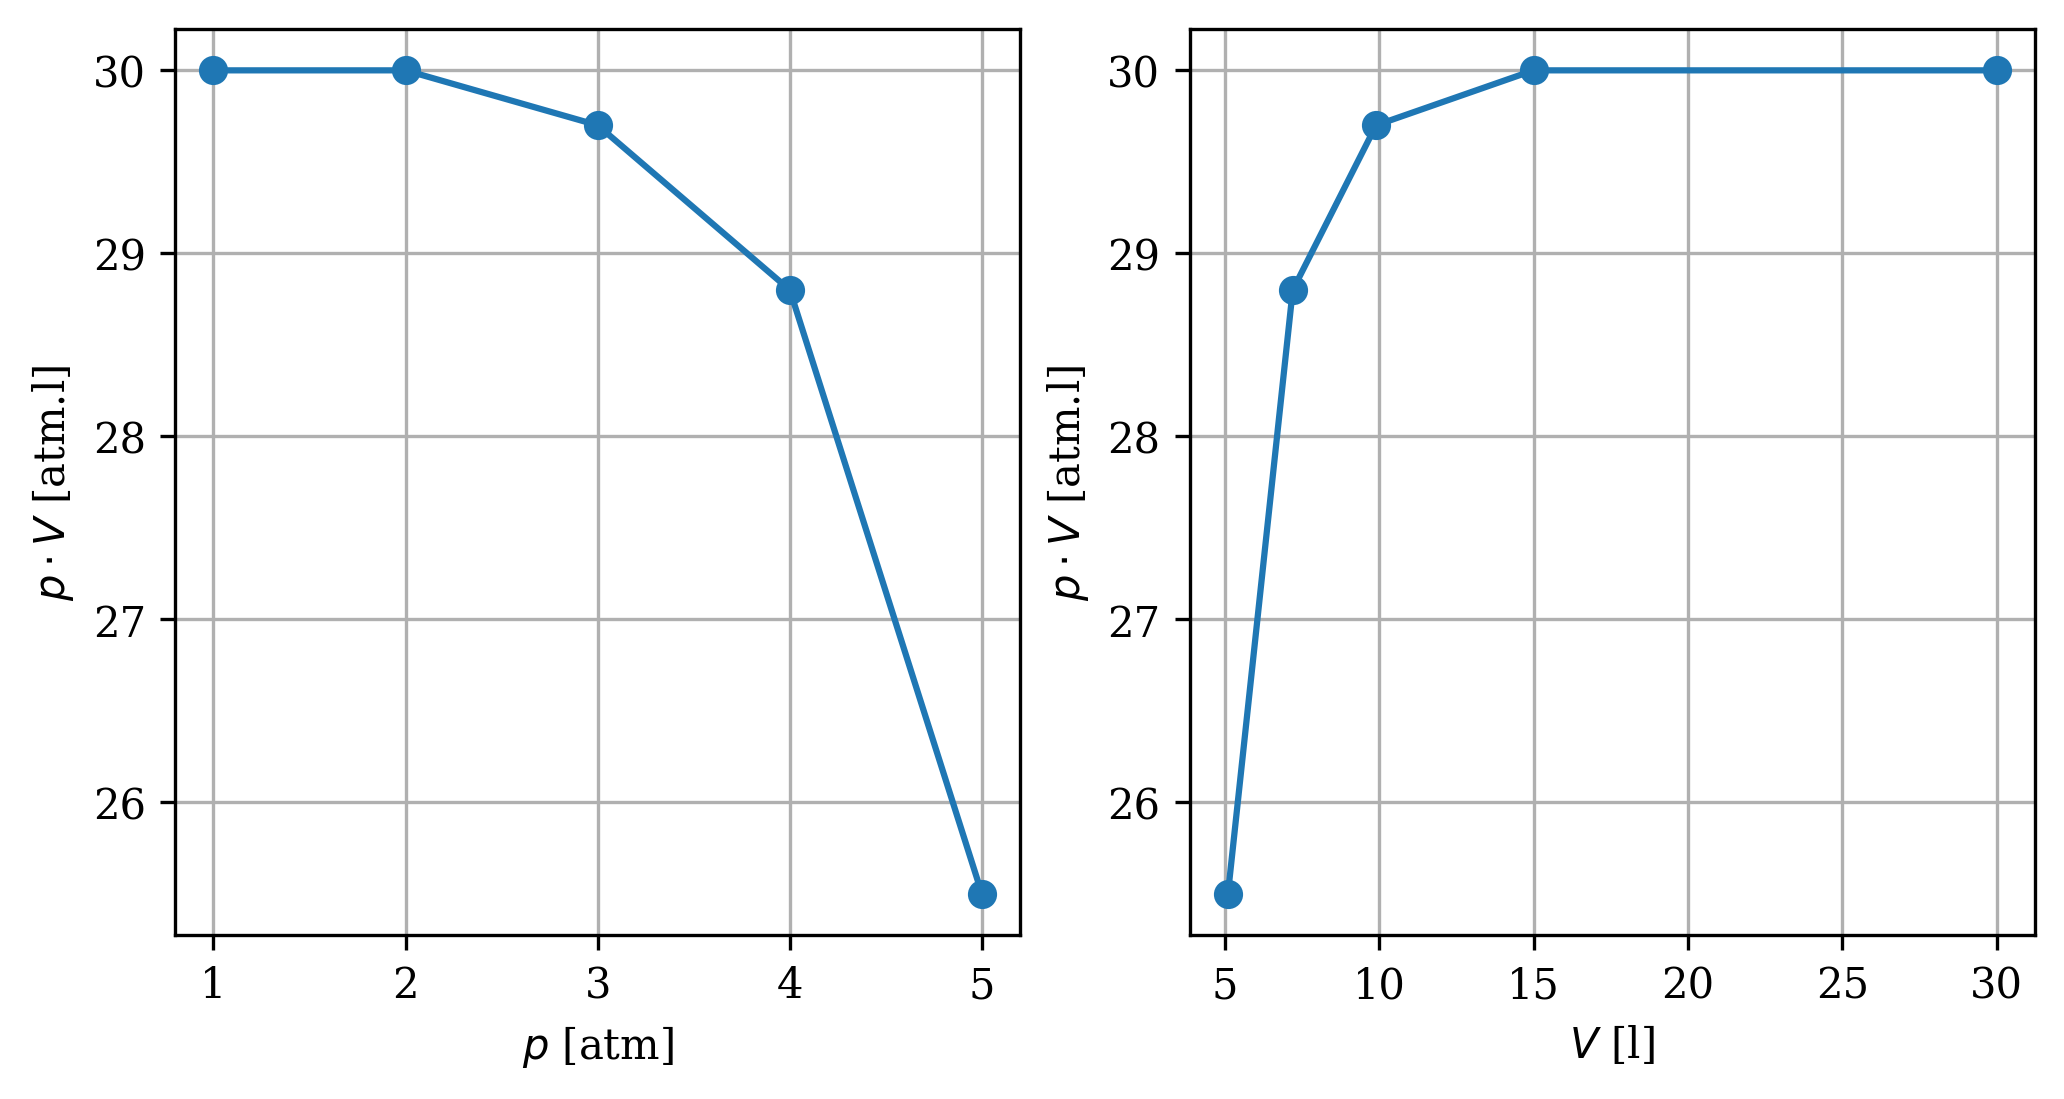

T = 92.4 °C


In [ ]:
#@title 1.a)
p = np.array([1, 2, 3, 4, 5])  # atm
V = np.array([30, 15, 9.9,  7.2, 5.1])  # l

plt.subplot(1, 2, 1)
plt.plot(p, p*V, '-o')
plt.grid()
plt.xlabel('$p$ [atm]')
plt.ylabel(r'$p \cdot V$ [atm.l]')
plt.subplot(1, 2, 2)
plt.plot(V, p*V, '-o')
plt.grid()
plt.xlabel('$V$ [l]')
plt.ylabel(r'$p \cdot V$ [atm.l]')
plt.show()

T_0 = cte.convert_temperature(p[0]*V[0]*cte.atm*1e-3/cte.R, 'Kelvin', 'Celsius')
print(f'T = {T_0:.3g} °C')

i) Los parametros son:
 R0 = 7.00 Ω
 a = 0.00392 °C⁻¹
 b = -5.94e-7 °C⁻2

ii) Los parametros son:
 m = 37.0 Ω⁻¹
 y0 = -259 °C
y se estima:
 Θ(18,387 Ω) = 421 °C


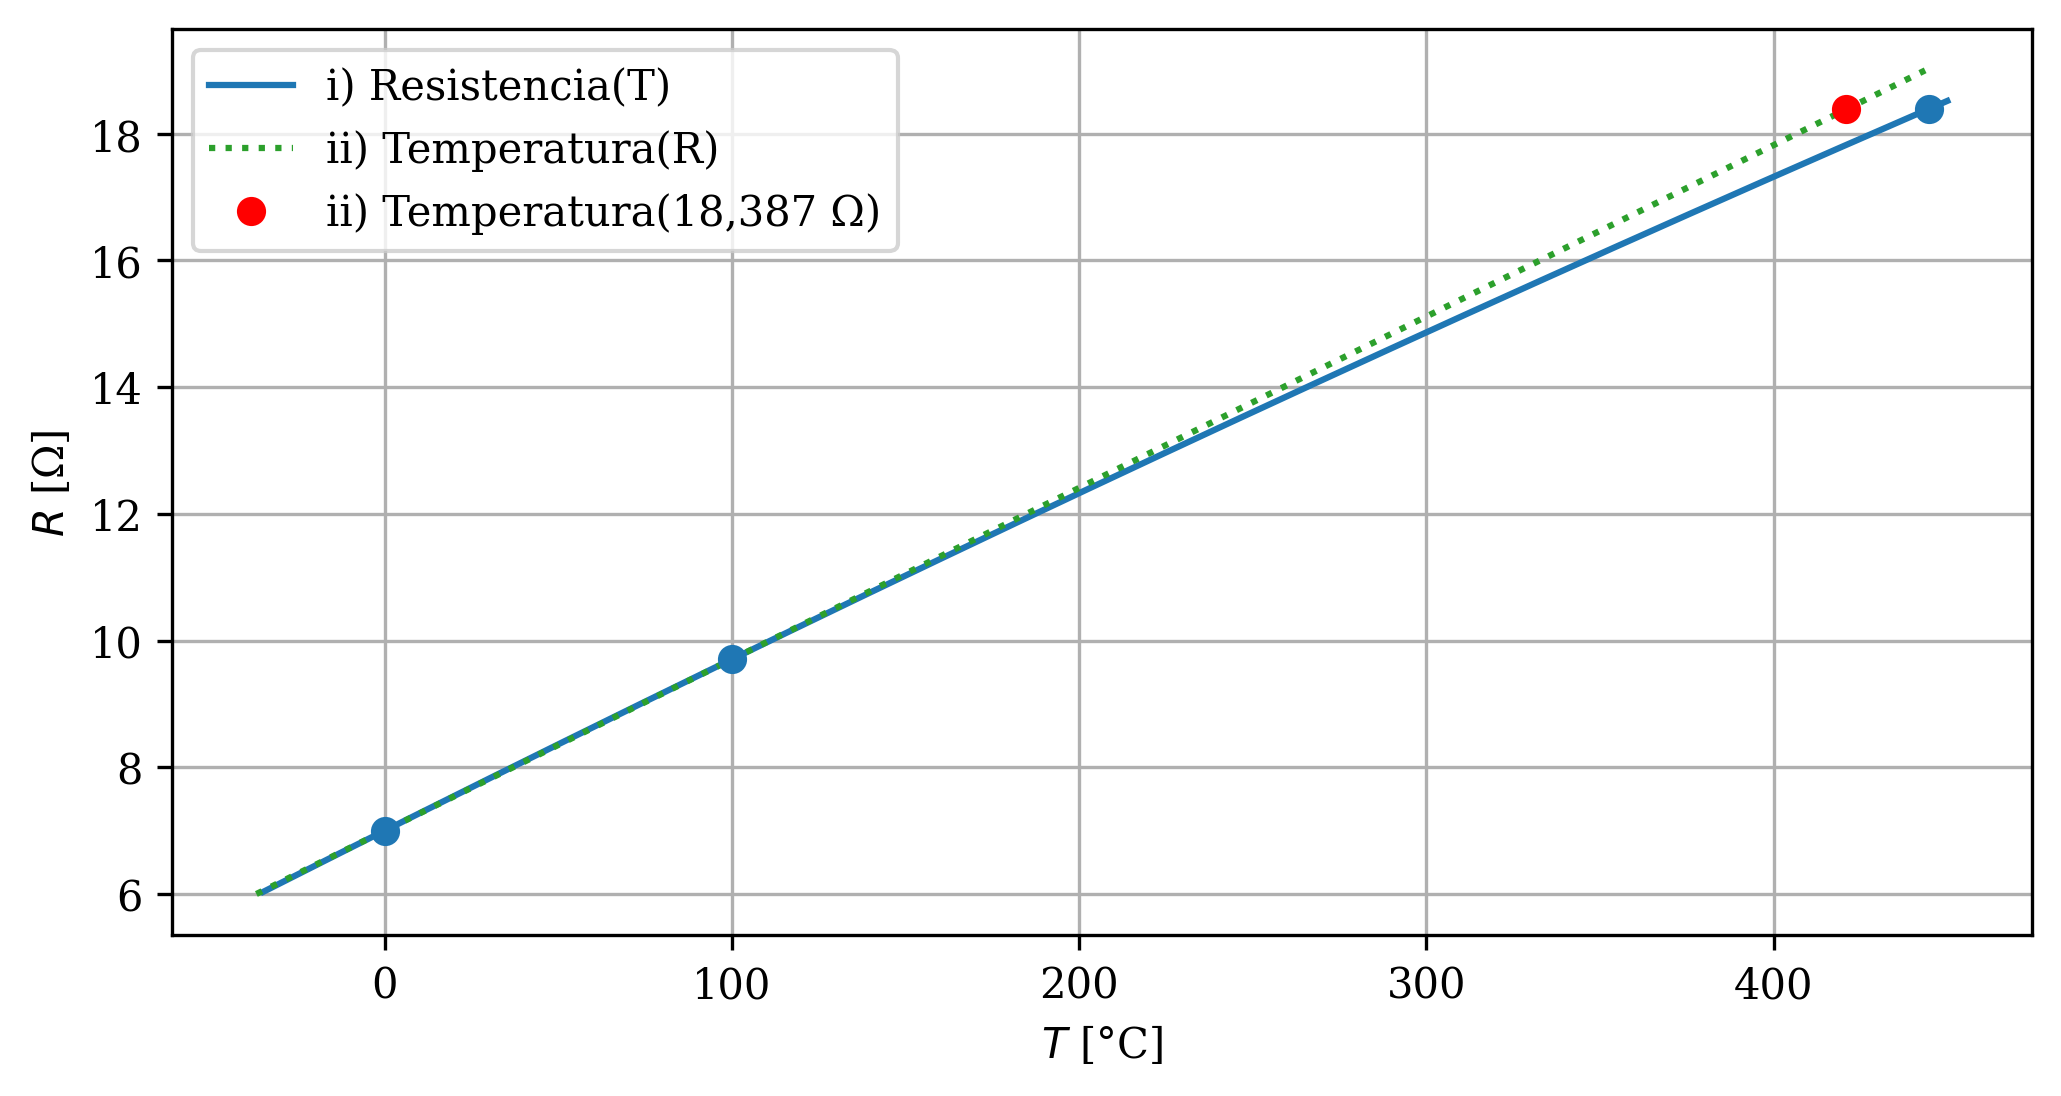

In [86]:
#@title 1.b)
# i) Se despejan los parametros a, b y R0
R0, a, b, T = sym.symbols('R0, a, b, T', real=True)
R = R0*(1 + a*T + b*T**2)
eq_sys = [sym.Eq(R.subs(T, 0), 7), sym.Eq(R.subs(T, 100), 9.705),
          sym.Eq(R.subs(T, 444.6), 18.389)]
vals = sym.solve_poly_system(eq_sys, [R0, a, b])
R0, a, b = vals[0]
R1 = lambda T: R0*(1 + a*T + b*T**2)
print('i) Los parametros son:')
print(f' R0 = {R0:.3g} Ω')
print(f' a = {a:.3g} °C⁻¹')
print(f' b = {b:.3g} °C⁻2')
# ii) Se despejan los parametros de la escala lineal de temperauras
m, y0, R = sym.symbols('m, y0, R', real=True)
Theta = m*R + y0
eq_sys = [sym.Eq(Theta.subs(R, 7), 0), sym.Eq(Theta.subs(R, 9.705), 100),]
vals = sym.solve_poly_system(eq_sys, [m, y0])
m, y0 = vals[0]
Theta = lambda R: m*R + y0
print('\nii) Los parametros son:')
print(f' m = {m:.3g} Ω⁻¹')
print(f' y0 = {y0:.3g} °C')
print('y se estima:')
print(f' Θ(18,387 Ω) = {Theta(18.387):.3g} °C')
# Grafico
t = np.linspace(-35, 450, 5000)
r = np.linspace(6, 19, 5000)
plt.plot(t, R1(t), '-C0', label='i) Resistencia(T)')
plt.plot(Theta(r), r, ':C2', label='ii) Temperatura(R)')
plt.plot([0, 100, 444.6], [7, 9.705, 18.387], 'o')
plt.plot([Theta(18.387)], [18.387], 'or', label='ii) Temperatura(18,387 Ω)')
plt.grid()
plt.legend()
plt.xlabel(r'$T$ [°C]')
plt.ylabel('$R$ [Ω]')
plt.show()

### 1.c)
$$\text{Sea } n(\Theta) \text{ la cantidad de divisiones del termómetro que se llenan de mercurio}$$

$$\text{ para una dada temperatura de magnitud } \Theta \text{ en grados Celsius, y } f(n) \text{ es una corrección a la medición del termometro tal que:}$$

$$f(n) + n(\Theta) = \Theta \quad \Rightarrow \quad f(n) = \Theta - n(\Theta) \quad \Rightarrow \quad f(n) = \Theta(n) - n$$

$$\text{Usando que } \Theta(n) = \frac{n + 2}{1.05} \text{, se tiene } f(n) = \frac{n + 2}{1.05} - n.$$

$$\text{Luego, no hay que aplicar corrección donde:}$$

$$f(n) = 0 \quad \iff \quad 0 = \frac{n + 2}{1.05} - n \quad \iff \quad n\cdot 1.05 = n + 2$$

$$\iff \quad (1.05 - 1)\cdot n = 2 \quad \iff \quad 0.05\cdot n = 2  \quad \iff \quad n = 40$$

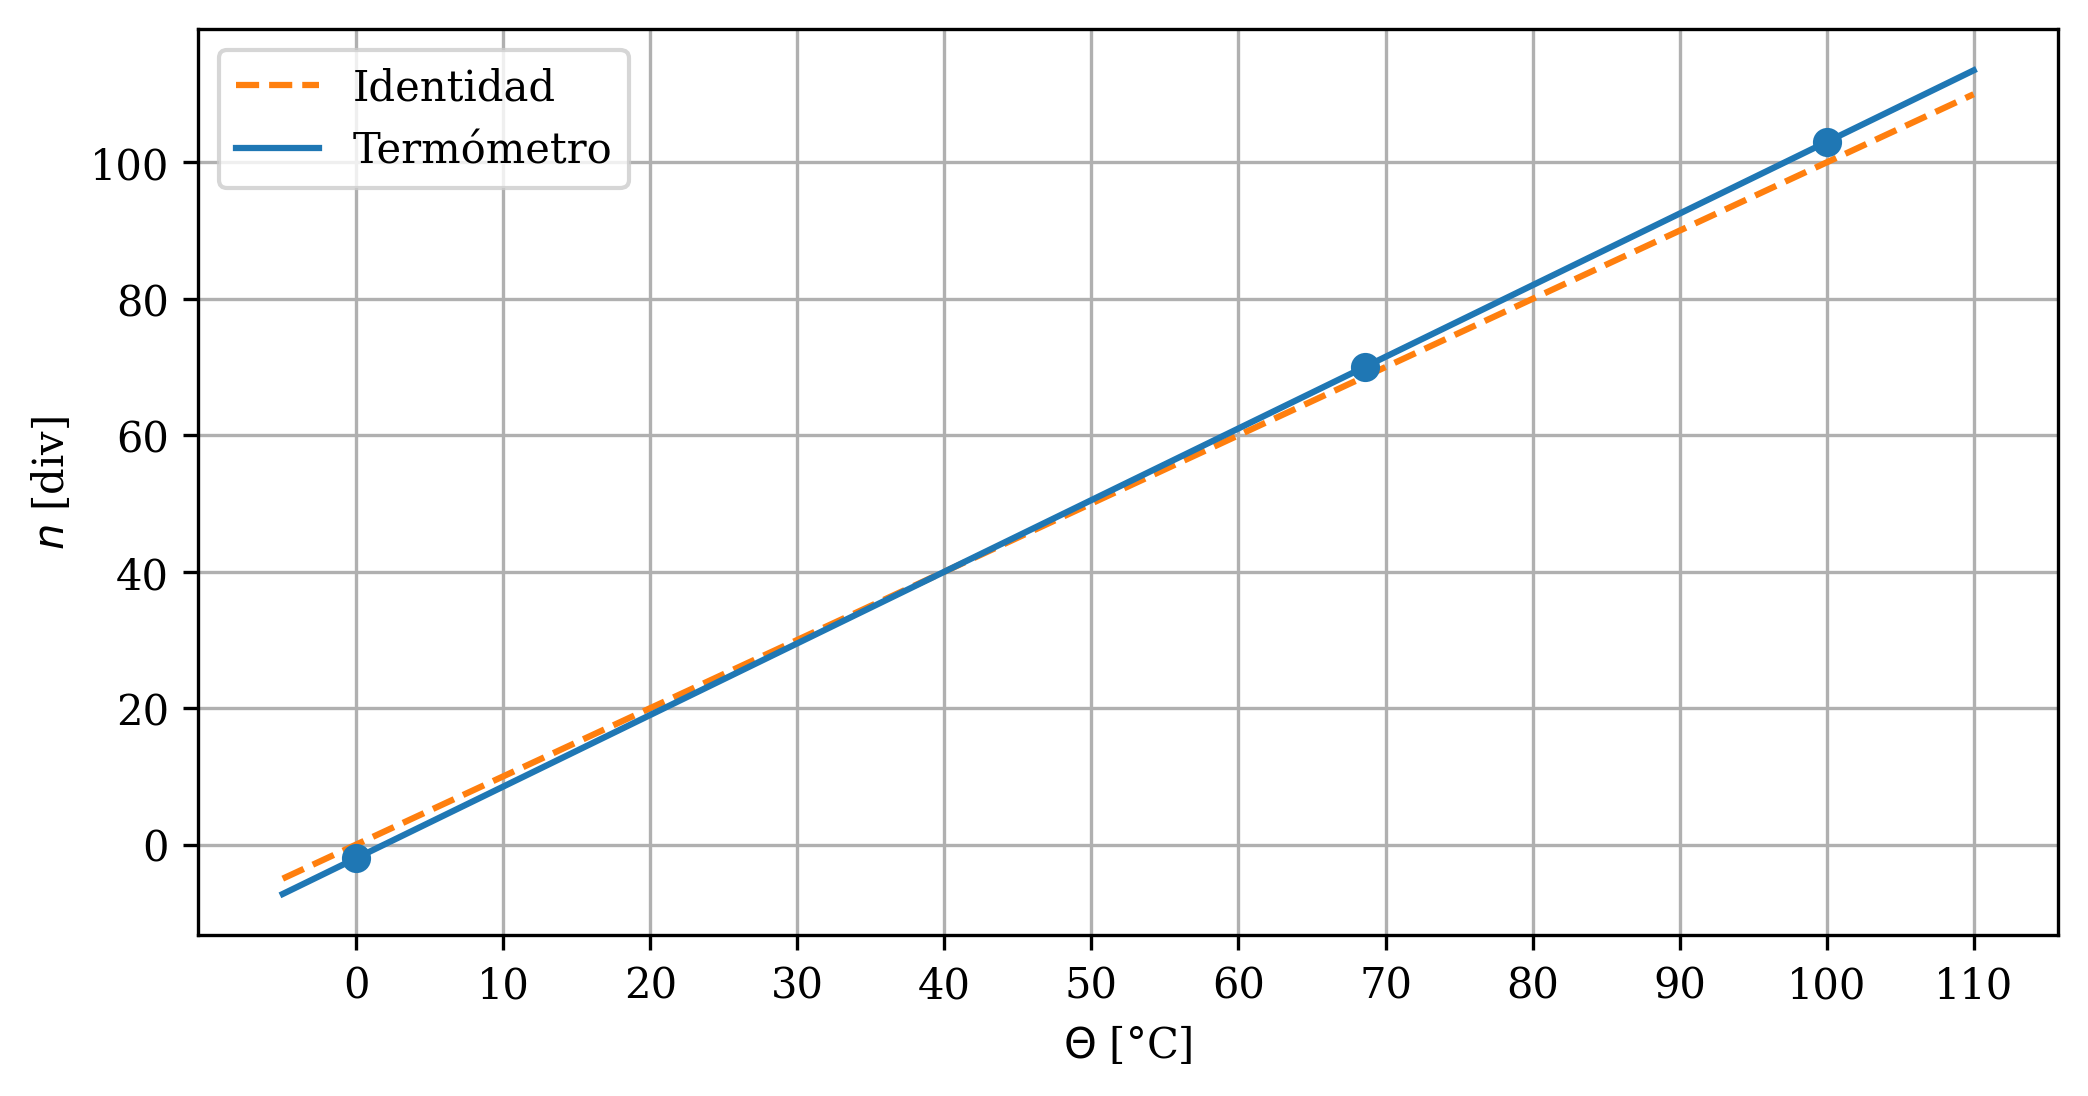

In [ ]:
#@title
a = 1.05
b = -2
n = lambda Theta: a*Theta + b
Theta = lambda n: (n - b)/a
t = np.linspace(-5, 110, 1000)
plt.plot(t, t, '--C1', label='Identidad')
plt.plot(t, n(t), '-C0', label='Termómetro')
plt.plot([0, Theta(70), 100], [n(0), 70, n(100)], 'o')
plt.grid()
plt.legend()
plt.xlabel(r'$\Theta$ [°C]')
plt.xticks(np.arange(0, 120, 10))
plt.ylabel('$n$ [div]')
plt.show()

### 1.d)
![Gráfico 1.d](https://github.com/agustinbrusco/Fisica-4/blob/main/Figs/Gu%C3%ADa%2002%20Gr%C3%A1fico%201d.png?raw=true)


i) Los parametros son para el termometro I a 300 dinas son:
 m = 5/12 °C/cm
 b = -50/3 °C
tal que Θ(l) = 5/12°C/cm*l -50/3°C
y se estima:
 I_300(100 cm) = 25 °C ~ T3

iii) A 300 dinas, y con una longitud de 160 cm, el termometro I mide:
 I_300(160 cm) = 50 °C

i) Los parametros son para el termometro II a 300 dinas son:
 m = 25/36 °C/cm
 b = -625/18 °C
tal que Θ(l) = 25/36°C/cm*l -625/18°C
y se estima:
 II_300(70 cm) = 13.9 °C ~ T3

ii) Los parametros son para el termometro I a 400 dinas son:
 m = 2/5 °C/cm
 b = -20 °C
tal que Θ(l) = 2/5°C/cm*l -20°C
y se estima:
 I_400(119 cm) = 27.6 °C ~ T3

ii) Los parametros son para el termometro II a 400 dinas son:
 m = 25/37 °C/cm
 b = -1550/37 °C
tal que Θ(l) = 25/37°C/cm*l -1550/37°C
y se estima:
 II_400(87 cm) = 16.9 °C ~ T3


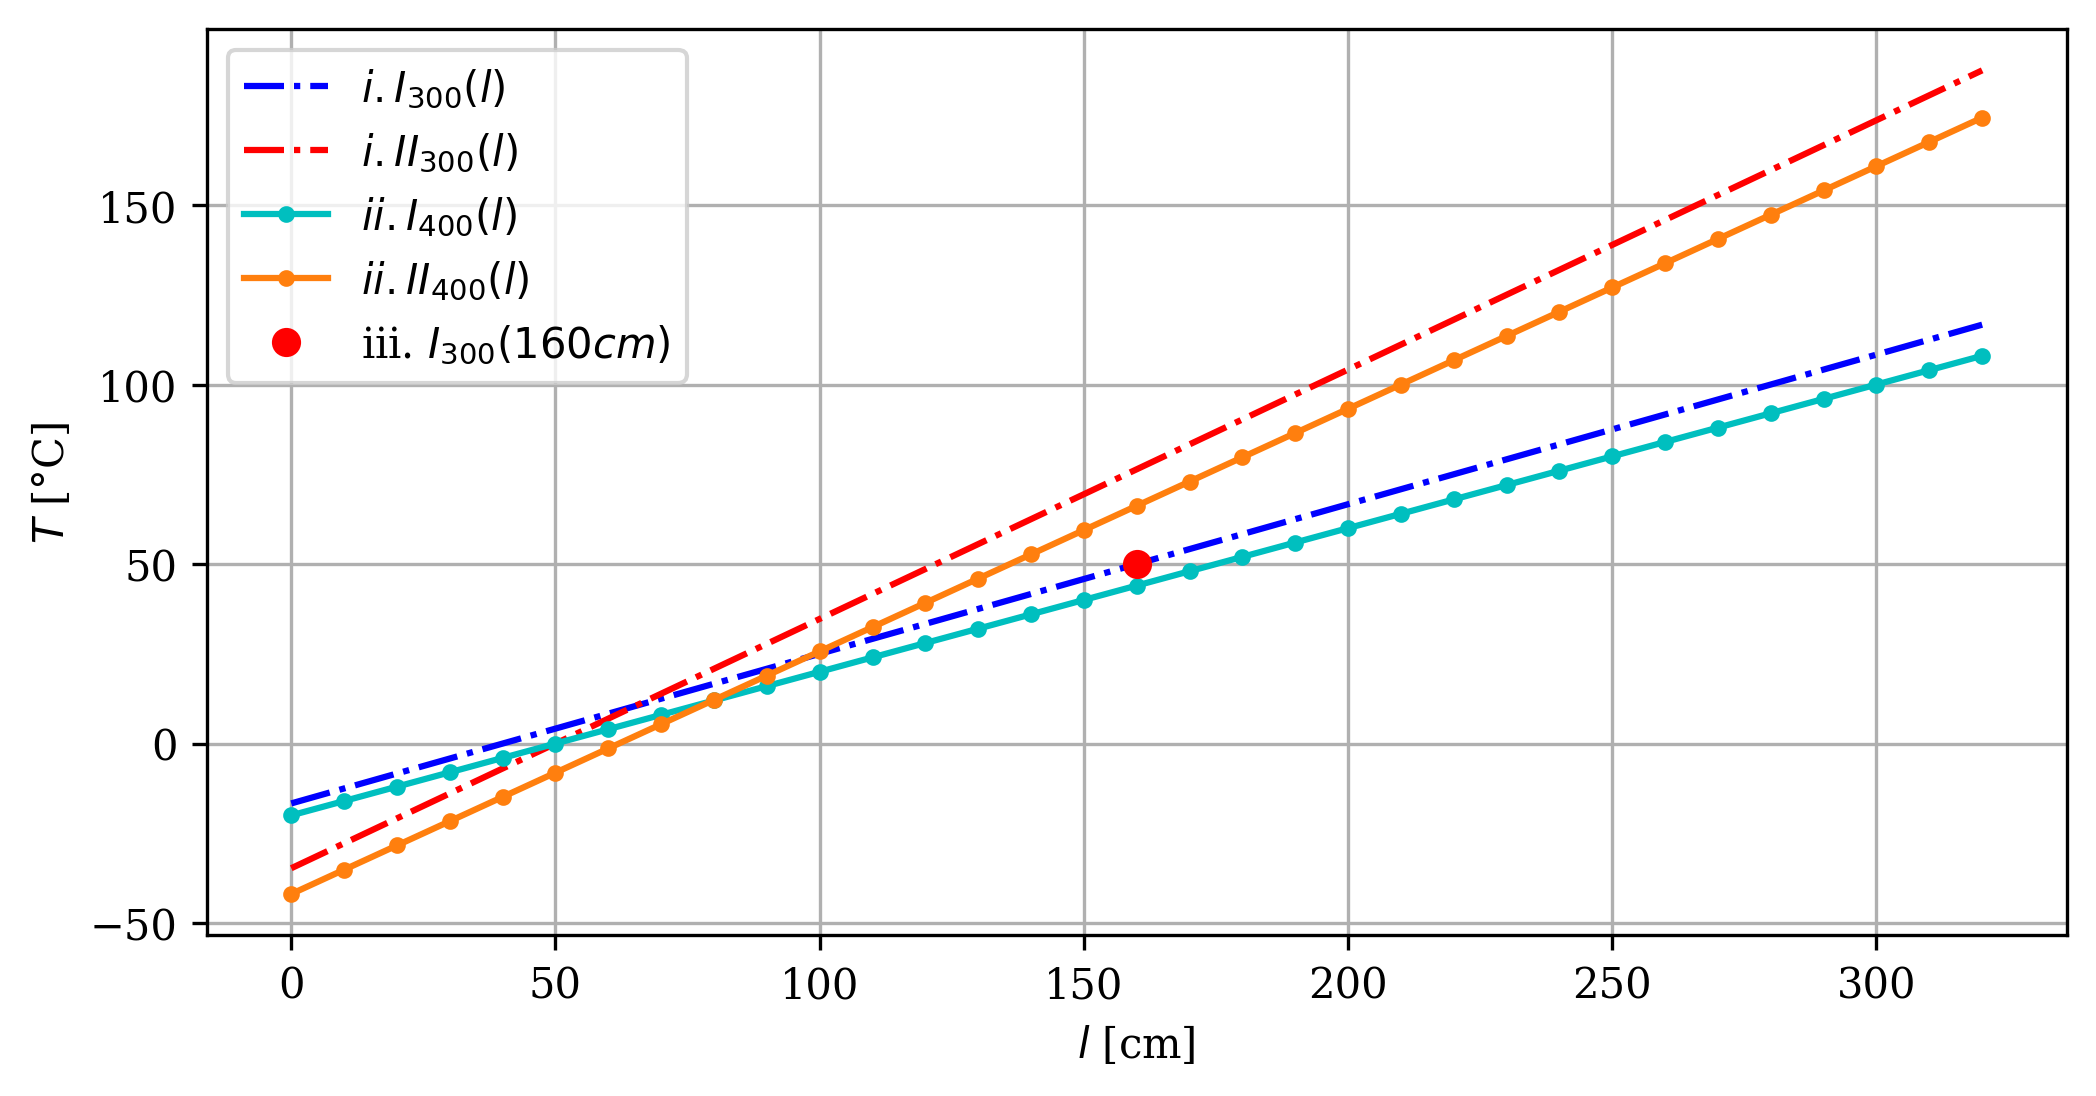

In [73]:
#@title
l_num = np.arange(0, 330, 10)  # predefino el dominio numerico
# Se despejan los parametros de la escala lineal de temperauras para I e II
# Termometro I, 300 dinas
m, b, l = sym.symbols('m, b, l', real=True)
Theta = m*l + b
eq_sys = [sym.Eq(Theta.subs(l, 40), 0), sym.Eq(Theta.subs(l, 280), 100),]
vals = sym.solve_poly_system(eq_sys, [m, b])
m, b = vals[0]
Theta1 = float(m)*l_num + float(b)
print('\ni) Los parametros son para el termometro I a 300 dinas son:')
print(f' m = {m} °C/cm')
print(f' b = {b} °C')
print(f'tal que Θ(l) = {m}°C/cm*l {b}°C')
print('y se estima:')
print(f' I_300(100 cm) = {m*100 + b} °C ~ T3')
# iii) Termometro I a 300 dinas y 160 cm
I_300_160 = m*160 + b
print('\niii) A 300 dinas, y con una longitud de 160 cm, el termometro I mide:' +
      f'\n I_300(160 cm) = {float(I_300_160):.3g} °C')

# Termometro II, 300 dinas
m, b, l = sym.symbols('m, b, l', real=True)
Theta = m*l + b
eq_sys = [sym.Eq(Theta.subs(l, 50), 0), sym.Eq(Theta.subs(l, 194), 100),]
vals = sym.solve_poly_system(eq_sys, [m, b])
m, b = vals[0]
Theta2 = float(m)*l_num + float(b)
print('\ni) Los parametros son para el termometro II a 300 dinas son:')
print(f' m = {m} °C/cm')
print(f' b = {b} °C')
print(f'tal que Θ(l) = {m}°C/cm*l {b}°C')
print('y se estima:')
print(f' II_300(70 cm) = {float(m*70 + b):.3g} °C ~ T3')

# Termometro I, 400 dinas
m, b, l = sym.symbols('m, b, l', real=True)
Theta = m*l + b
eq_sys = [sym.Eq(Theta.subs(l, 50), 0), sym.Eq(Theta.subs(l, 300), 100),]
vals = sym.solve_poly_system(eq_sys, [m, b])
m, b = vals[0]
Theta3 = float(m)*l_num + float(b)
print('\nii) Los parametros son para el termometro I a 400 dinas son:')
print(f' m = {m} °C/cm')
print(f' b = {b} °C')
print(f'tal que Θ(l) = {m}°C/cm*l {b}°C')
print('y se estima:')
print(f' I_400(119 cm) = {float(m*119 + b):.3g} °C ~ T3')

# Termometro II, 400 dinas
m, b, l = sym.symbols('m, b, l', real=True)
Theta = m*l + b
eq_sys = [sym.Eq(Theta.subs(l, 62), 0), sym.Eq(Theta.subs(l, 210), 100),]
vals = sym.solve_poly_system(eq_sys, [m, b])
m, b = vals[0]
Theta4 = float(m)*l_num + float(b)
print('\nii) Los parametros son para el termometro II a 400 dinas son:')
print(f' m = {m} °C/cm')
print(f' b = {b} °C')
print(f'tal que Θ(l) = {m}°C/cm*l {b}°C')
print('y se estima:')
print(f' II_400(87 cm) = {float(m*87 + b):.3g} °C ~ T3')

# Grafico los termometros calibrados linealmente a distintas tensiones
plt.plot(l_num, Theta1, '-.b', label='$i. I_{300}(l)$')
plt.plot(l_num, Theta2, '-.r', label='$i. II_{300}(l)$')
plt.plot(l_num, Theta3, '.-c', label='$ii. I_{400}(l)$')
plt.plot(l_num, Theta4, '.-C1', label='$ii. II_{400}(l)$')
plt.plot([160], [float(I_300_160)], 'or', label='iii. $I_{300}(160 cm)$')
plt.grid()
plt.legend()
plt.xlabel(r'$l$ [cm]')
plt.ylabel('$T$ [°C]')
plt.show()

###1.e)
**Interpretación:** Son diferentes gases ideales (por lo tanto distintas densidades $\Rightarrow$ distintos $v$ aunque $V$ se mantenga constante) cuya presión se midió a $T_\text{hielo}$ = 0 °C y luego a temperaturas $T$.

$$p = \frac{R \cdot T}{v}, \text{ en particular:} \quad p_i = \frac{R \cdot 273,15 \text{K}}{v} \Rightarrow v = \frac{R \cdot 273,15 \text{K}}{p_i}$$

$$\Rightarrow \quad p = \frac{R \cdot T \cdot p_i}{R \cdot 273,15 \text{K}}$$


In [82]:
#@title 
p_i = np.array([100, 200, 300, 400])*cte.atm/cte.mmHg  # atm
p = np.array([127.9, 256.5, 385.8, 516.0])*cte.atm/cte.mmHg  # atm
T_hielo = cte.convert_temperature(0, 'Celsius', 'Kelvin')  # K
v = cte.R*T_hielo/p_i  # m³/mol
T = p*v/cte.R  # K
for i, t in enumerate(T):
    print(f'p = {p[i]*cte.mmHg/cte.atm} mmHg --> T = {t:.3g} K')

p = 127.9 mmHg --> T = 349 K
p = 256.5 mmHg --> T = 350 K
p = 385.8 mmHg --> T = 351 K
p = 516.0 mmHg --> T = 352 K
